# DATA 602 Project (ML)

## Asteroid Classification - PHA (Potentially Hazardous Asteroid)

### Data Source: https://ssd.jpl.nasa.gov/tools/sbdb_query.html#!#results

In [1]:
# Displaying image
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://media-cldnry.s-nbcnews.com/image/upload/newscms/2018_25/2472691/180621-asteroid-al-0944.jpg")

### Potentially Hazardous Asteroids (PHAs) are currently defined based on parameters that measure the asteroid’s potential to make threatening close approaches to the Earth. Specifically, all asteroids with a minimum orbit intersection distance (MOID) of 0.05 au or less and an absolute magnitude (H) of 22.0 or less are considered PHAs.

##### Reference: https://cneos.jpl.nasa.gov/glossary/PHA.html

### Importing Libraries:

In [30]:
# Importing libraries
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import pandas_profiling
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import recall_score

### Setting up some notebook parameters:

In [3]:
# Setting jupyter notebook constraints to display max 500 columns and rows
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [4]:
# Ignoring warning logs
warnings.filterwarnings('ignore')

### Loading data:

In [5]:
# Reading data
df = pd.read_csv('sbdb_query_results.csv', low_memory=False)

In [6]:
df

full_name      a       e      i      om       w      q  \
0              1 Ceres (A801 AA)  2.766  0.0785  10.59   80.27   73.64  2.549   
1             2 Pallas (A802 FA)  2.771  0.2300  34.93  172.92  310.70  2.134   
2               3 Juno (A804 RA)  2.669  0.2569  12.99  169.85  247.94  1.983   
3              4 Vesta (A807 FA)  2.361  0.0882   7.14  103.80  151.09  2.153   
4            5 Astraea (A845 XA)  2.575  0.1901   5.37  141.57  358.74  2.086   
...                          ...    ...     ...    ...     ...     ...    ...   
612006        612007 (2007 MW27)  3.141  0.1939   6.75  105.20  152.86  2.532   
612007        612008 (2007 MZ27)  2.516  0.1616  18.19   77.52  198.45  2.110   
612008        612009 (2007 MT28)  3.230  0.0981   9.34  119.20  153.84  2.914   
612009        612010 (2007 MY28)  3.143  0.1040   6.39  271.41   17.86  2.816   
612010        612011 (2007 MF30)  3.136  0.0849  10.55  283.05  345.45  2.870   

          ad  per.y  data_arc  condition_code  n_obs_used  n_del_obs_used  \
0       2.98   4.60      9520             0.0        1075            60.0   
1       3.41   4.61     79390             0.0        9025             NaN   
2       3.35   4.36     79279             0.0        7361             NaN   
3       2.57   3.63     25743             0.0        9451          2977.0   
4       3.06   4.13     64243             0.0        3288             NaN   
...      ...    ...       ...             ...         ...             ...   
612006  3.75   5.57      5334             0.0         127             NaN   
612007  2.92   3.99      5336             0.0         109             NaN   
612008  3.55   5.81      5314             0.0          81             NaN   
612009  3.47   5.57      5315             0.0          80             NaN   
612010  3.40   5.55      5340             0.0          68             NaN   

        n_dop_obs_used      H    spkid    pdes     name  prefix neo pha     G  \
0                  0.0   3.56  2000001       1    Ceres     NaN   N   N  0.12   
1                  NaN   4.24  2000002       2   Pallas     NaN   N   N  0.11   
2                  NaN   5.28  2000003       3     Juno     NaN   N   N  0.32   
3                  0.0   3.40  2000004       4    Vesta     NaN   N   N  0.32   
4                  NaN   6.98  2000005       5  Astraea     NaN   N   N   NaN   
...                ...    ...      ...     ...      ...     ...  ..  ..   ...   
612006             NaN  16.34  2612007  612007      NaN     NaN   N   N   NaN   
612007             NaN  17.00  2612008  612008      NaN     NaN   N   N   NaN   
612008             NaN  16.93  2612009  612009      NaN     NaN   N   N   NaN   
612009             NaN  16.73  2612010  612010      NaN     NaN   N   N   NaN   
612010             NaN  16.44  2612011  612011      NaN     NaN   N   N   NaN   

        M1  M2  K1  K2  PC  diameter                 extent  albedo  \
0      NaN NaN NaN NaN NaN   939.400  964.4 x 964.2 x 891.8  0.0900   
1      NaN NaN NaN NaN NaN   513.000            568x532x448  0.1550   
2      NaN NaN NaN NaN NaN   246.596                    NaN  0.2140   
3      NaN NaN NaN NaN NaN   525.400  572.6 x 557.2 x 446.4  0.4228   
4      NaN NaN NaN NaN NaN   106.699                    NaN  0.2740   
...     ..  ..  ..  ..  ..       ...                    ...     ...   
612006 NaN NaN NaN NaN NaN       NaN                    NaN     NaN   
612007 NaN NaN NaN NaN NaN       NaN                    NaN     NaN   
612008 NaN NaN NaN NaN NaN       NaN                    NaN     NaN   
612009 NaN NaN NaN NaN NaN       NaN                    NaN     NaN   
612010 NaN NaN NaN NaN NaN       NaN                    NaN     NaN   

          rot_per         GM     BV     UB  IR spec_B spec_T  H_sigma  \
0        9.074170  62.628400  0.713  0.426 NaN      C      G      NaN   
1        7.813221  13.630000  0.635  0.284 NaN      B      B      NaN   
2        7.210000        NaN  0.824  0.433 NaN     Sk      S      NaN   
3      

### Performing data analysis to prepare the data best way possible for ML:

#### In our dataset, the tareget variable is 'pha' which stands for 'Potentially Hazardous Asteroid'. This is a highly imbalanced class with proportion shown below:

In [7]:
# Seeing how many categories we have and their proportions
df.pha.value_counts()

N    611239
Y       772
Name: pha, dtype: int64

#### <font color=red>Hence, our main focus would be to evaluate our models based on the recall score of minority class.</font>

In [8]:
# Replacing Yes with 1 and No with 0 for ML models
df['pha'] = np.where(df.pha == 'Y', 1, 0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612011 entries, 0 to 612010
Data columns (total 74 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   full_name       612011 non-null  object 
 1   a               612011 non-null  float64
 2   e               612011 non-null  float64
 3   i               612011 non-null  float64
 4   om              612011 non-null  float64
 5   w               612011 non-null  float64
 6   q               612011 non-null  float64
 7   ad              612011 non-null  float64
 8   per.y           612011 non-null  float64
 9   data_arc        612011 non-null  int64  
 10  condition_code  612010 non-null  float64
 11  n_obs_used      612011 non-null  int64  
 12  n_del_obs_used  423 non-null     float64
 13  n_dop_obs_used  423 non-null     float64
 14  H               612011 non-null  float64
 15  spkid           612011 non-null  int64  
 16  pdes            612011 non-null  int64  
 17  name      

#### We have so many null values in particular columns because certain criterias do not belong to certain aestroid/meteror classes.

In [10]:
# Seeing how many null values we have
df.isna().sum()

full_name              0
a                      0
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     0
per.y                  0
data_arc               0
condition_code         1
n_obs_used             0
n_del_obs_used    611588
n_dop_obs_used    611588
H                      0
spkid                  0
pdes                   0
name              588930
prefix            612011
neo                    0
pha                    0
G                 611892
M1                612011
M2                612011
K1                612011
K2                612011
PC                612011
diameter          482347
extent            611993
albedo            482914
rot_per           580040
GM                611997
BV                610990
UB                611032
IR                612010
spec_B            610400
spec_T            611031
H_sigma           578072
diameter_sigma    482469
orbit_id               0


#### On my first try at this dataset, I tried to drop the columns which have a significant proportion of null values and are collinear to a few columns. The resulting models did not perform well with recall value of minority class around 50%-55% , leading me to drop columns according to Pandas Profiling report.

In [11]:
# # Dropping because sooo many null values. Doesn't make sense to impute these values.
# df.drop(['n_del_obs_used', 'n_dop_obs_used', 'name', 'prefix', 'G', 'M1', 'M2', 'K1', 'K2', 'PC', 'diameter', 'extent', 'albedo', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'H_sigma', 'diameter_sigma', 'two_body', 'A1', 'A2', 'A3', 'DT'], axis=1, inplace=True)

# # Since sigma represents uncertainity, no significance in developing ML model. Hence dropping
# s_list = []

# for names in df.columns:
#     if 'sigma' in names:
#         s_list.append(names)
#         print(names)

# df.drop(s_list, axis=1, inplace=True)
# print("Dropped above columns.")

# # Treating correlation amongst columns
# cor_matrix = df.corr().abs()
# upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))

# to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.90)]
# print("Columns which will be dropped:")
# print(to_drop)

# df.drop(to_drop, axis=1, inplace=True)

[Text(0.5, 0, 'a'),
 Text(2.5, 0, 'i'),
 Text(4.5, 0, 'w'),
 Text(6.5, 0, 'ad'),
 Text(8.5, 0, 'data_arc'),
 Text(10.5, 0, 'n_obs_used'),
 Text(12.5, 0, 'n_dop_obs_used'),
 Text(14.5, 0, 'spkid'),
 Text(16.5, 0, 'prefix'),
 Text(18.5, 0, 'G'),
 Text(20.5, 0, 'M2'),
 Text(22.5, 0, 'K2'),
 Text(24.5, 0, 'diameter'),
 Text(26.5, 0, 'rot_per'),
 Text(28.5, 0, 'BV'),
 Text(30.5, 0, 'IR'),
 Text(32.5, 0, 'diameter_sigma'),
 Text(34.5, 0, 'epoch.mjd'),
 Text(36.5, 0, 'n'),
 Text(38.5, 0, 'per'),
 Text(40.5, 0, 'moid.ld'),
 Text(42.5, 0, 't_jup'),
 Text(44.5, 0, 'sigma_a'),
 Text(46.5, 0, 'sigma_i'),
 Text(48.5, 0, 'sigma_w'),
 Text(50.5, 0, 'sigma_ad'),
 Text(52.5, 0, 'sigma_tp'),
 Text(54.5, 0, 'rms'),
 Text(56.5, 0, 'A1'),
 Text(58.5, 0, 'A3')]

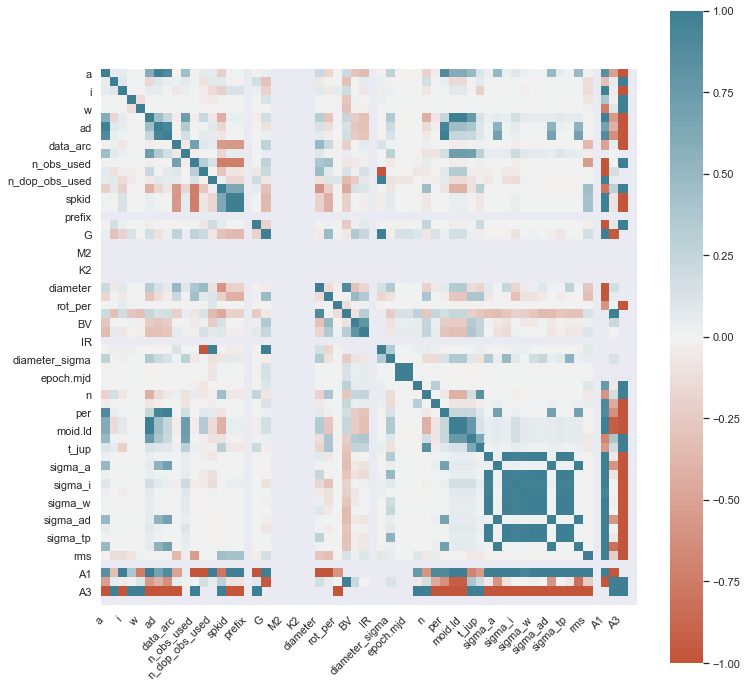

In [12]:
# Visualizing the correlation matrix for easy interpretability

corr = df.corr()

sns.set(rc = {'figure.figsize':(12,12)})
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

#### You might be observing correlation amongst a lot of variables in the above matrix but the correlation depicted above is largely due to the sparse columns present in the df.

#### On my first try at this dataset, I tried to drop the columns which have a significant proportion of null values and are correlated to a few columns. The resulting models did not perform well with recall value of minority class around 50%-55% , hence I will be dropping columns according to Pandas Profiling report generated below.

In [13]:
# Generating a profiling report to see what features we need to work on
profile = pandas_profiling.ProfileReport(df, title="Pandas Profiling Report", minimal=True)
profile

In [14]:
# Treating some variables considering the generated report above
df['tp.cal'] = df['tp.cal'].str[:-2]
df['tp.cal'] = pd.to_datetime(df['tp.cal'], format = '%Y-%m-%d', errors = 'coerce')

df['first_obs'] = pd.to_datetime(df['first_obs'], format = '%Y-%m-%d', errors = 'coerce')
df['last_obs'] = pd.to_datetime(df['last_obs'], format = '%Y-%m-%d', errors = 'coerce')

df['tp_year'] = df['tp.cal'].dt.year
df['tp_month'] = df['tp.cal'].dt.month
df['tp_day'] = df['tp.cal'].dt.day

df['first_obs_year'] = df['first_obs'].dt.year
df['first_obs_month'] = df['first_obs'].dt.month
df['first_obs_day'] = df['first_obs'].dt.day

df['last_obs_year'] = df['last_obs'].dt.year
df['last_obs_month'] = df['last_obs'].dt.month
df['last_obs_day'] = df['last_obs'].dt.day

In [15]:
# Dropping variables considering the report generated above
df.drop(['full_name', 'orbit_id', 'epoch.cal', 'tp.cal', 'first_obs', 'last_obs', 'producer', 'equinox', 'spkid', 'name', 'extent', 'spec_B', 'spec_T'], axis=1, inplace=True)

## ML Start:

In [16]:
# Setting X and Y 
y = df.pha

features = []

for name in df.columns:
    if name != 'pha':
        features.append(name)

X = df[features]

In [17]:
# Splitting dataset into train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

print(f'Training samples: {X_train.shape[0]:,}')
print(f'Test samples: {X_test.shape[0]:,}')

Training samples: 489,608
Test samples: 122,403


### Logistic Regression:

In [18]:
# Implementing a pipeline which handles data and makes it ready for models to train on
cat_vars = []
num_vars = []

for col in X.columns:
    if df[col].dtype == 'object':
        cat_vars.append(col)
    if (df[col].dtype == 'int64') or (df[col].dtype == 'float64'):
        num_vars.append(col)

num_pipeline = Pipeline([('impute_missing', SimpleImputer(strategy='median')),
                           ('standardize_num', StandardScaler())
                        ])

cat_pipeline = Pipeline([('impute_missing_cats', SimpleImputer(strategy='most_frequent')),
                          ('create_dummies_cats', OneHotEncoder(handle_unknown='error', drop='first'))])

processing_pipeline = ColumnTransformer(transformers=[('proc_numeric', num_pipeline, num_vars),
                                                      ('create_dummies', cat_pipeline, cat_vars)])

print(processing_pipeline)

ColumnTransformer(transformers=[('proc_numeric',
                                 Pipeline(steps=[('impute_missing',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardize_num',
                                                  StandardScaler())]),
                                 ['a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per.y',
                                  'data_arc', 'condition_code', 'n_obs_used',
                                  'n_del_obs_used', 'n_dop_obs_used', 'H',
                                  'pdes', 'prefix', 'G', 'M1', 'M2', 'K1', 'K2',
                                  'PC', 'diameter', 'albedo', 'rot_per', 'GM',
                                  'BV', 'UB', 'IR', 'H_sigma', ...]),
                                ('create_dummies',
                                 Pipeline(steps=[('impute_missing_cats',
                                                  SimpleImputer(strateg

In [19]:
%%time

# Implementing Logistic Regression model using the processing pipeline generated above

modeling_pipeline = Pipeline([('data_processing', processing_pipeline), ('logreg', LogisticRegression(max_iter=500))])
log_reg_model = modeling_pipeline.fit(X_train, y_train)

y_hat = log_reg_model.predict(X_test)

print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    122246
           1       0.82      0.87      0.84       157

    accuracy                           1.00    122403
   macro avg       0.91      0.93      0.92    122403
weighted avg       1.00      1.00      1.00    122403

Wall time: 43.7 s


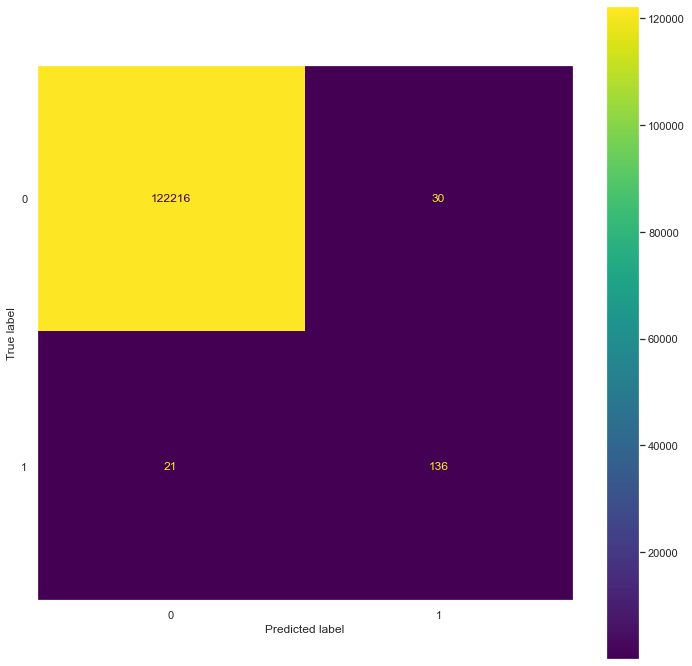

In [20]:
# Plotting confusion matrix
plot_confusion_matrix(log_reg_model, X_test, y_test)
plt.grid(False)
plt.show()

#### Macro average is the way to go since our class is highly imbalanced!

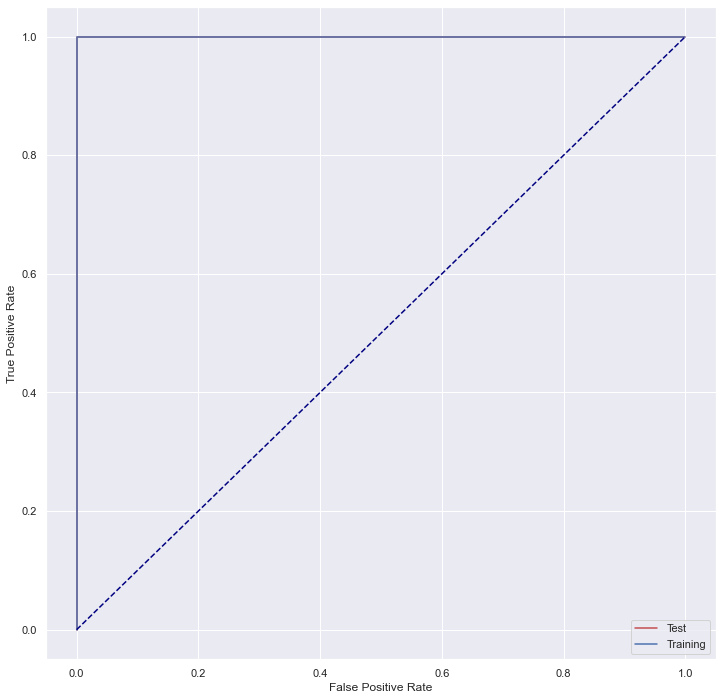

In [21]:
# Plotting an ROC Curve
def generate_probs(X, model=log_reg_model):
    return model.predict_proba(X)[:, 1]

def generate_roc(y, probs):
    fpr, tpr, _ = roc_curve(y, probs)
    return fpr, tpr
    
fpr_test, tpr_test = generate_roc(y_test, generate_probs(X_test))
fpr_train, tpr_train = generate_roc(y_train, generate_probs(X_train))

plt.plot(fpr_test, tpr_test,'-r')
plt.plot(fpr_train, tpr_train,'-b')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Test','Training'])
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

#### <font color=red>Above is a ROC curve, but I feel plotting this curve, and even roc_auc score is pointless in our case. Hence I will try to avoid plotting them further.</font>

In [22]:
# Getting ROC-AUC score
def generate_probs(X, model=log_reg_model):
    return model.predict_proba(X)[:, 1]

roc_auc_score(y_test, generate_probs(X_test))

0.999856246843188

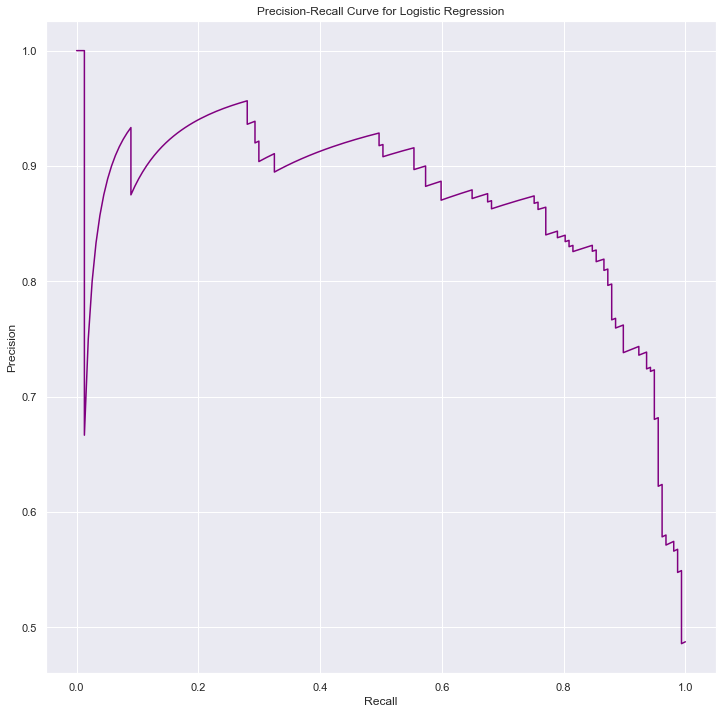

In [23]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, generate_probs(X_test))

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve for Logistic Regression')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

#### We shouldn't be excited to see such a high accuracy, since >99% of class is 'N', even if the model predicted 'N' for all observations, we could get 99% accuracy. That's why we'll focus on recall score of minority class which is 87% in this case. Hmm... that's not bad for the baseline model!

### Logistic Regression with L2 Regularization:

In [25]:
%%time

# Implementing a Logistic Regression model with regularization, the hyperparameters have been set after observing how the model performed during multiple runs

lr_reg_pipeline = Pipeline([('data_processing', processing_pipeline), ('logreg', LogisticRegression())])

param_grid = [{'logreg__penalty': ['l2'],
               'logreg__C': [0.01, 0.1, 1.0, 10],
               'logreg__max_iter': [5000]
              }]

lr_reg_results = GridSearchCV(estimator=lr_reg_pipeline, param_grid=param_grid, scoring='recall', refit=True)
lr_reg_results = lr_reg_results.fit(X_train, y_train)
lr_reg_yhat = lr_reg_results.predict(X_test)

lr_reg_results.best_estimator_

Wall time: 18min 2s


Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['a', 'e', 'i', 'om', 'w',
                                                   'q', 'ad', 'per.y',
                                                   'data_arc', 'condition_code',
                                                   'n_obs_used',
                                                   'n_del_obs_used',
                                                   'n_dop_obs_used', 'H',
                                                   'pdes', 'prefix', 'G', 'M1',
                    

In [26]:
y_testp = lr_reg_results.predict(X_test)
y_testp_lr = lr_reg_results.predict_proba(X_test)

print(classification_report(y_test, y_testp))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    122246
           1       0.90      0.95      0.93       157

    accuracy                           1.00    122403
   macro avg       0.95      0.97      0.96    122403
weighted avg       1.00      1.00      1.00    122403



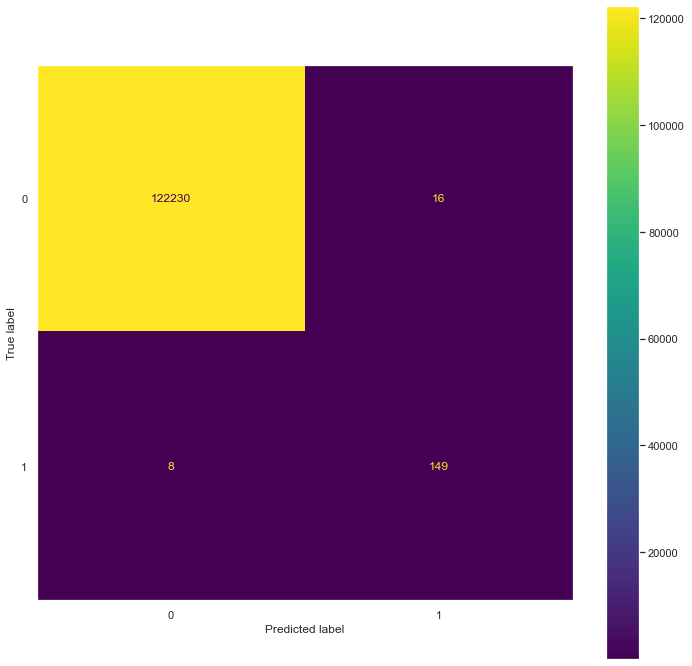

In [27]:
plot_confusion_matrix(lr_reg_results, X_test, y_test)
plt.grid(False)
plt.show()

In [28]:
def generate_probs(X, model=lr_reg_results):
    return model.predict_proba(X)[:, 1]

print("ROC-AUC score: ")
print(roc_auc_score(y_test, generate_probs(X_test)))

ROC-AUC score: 
0.9999665496460045


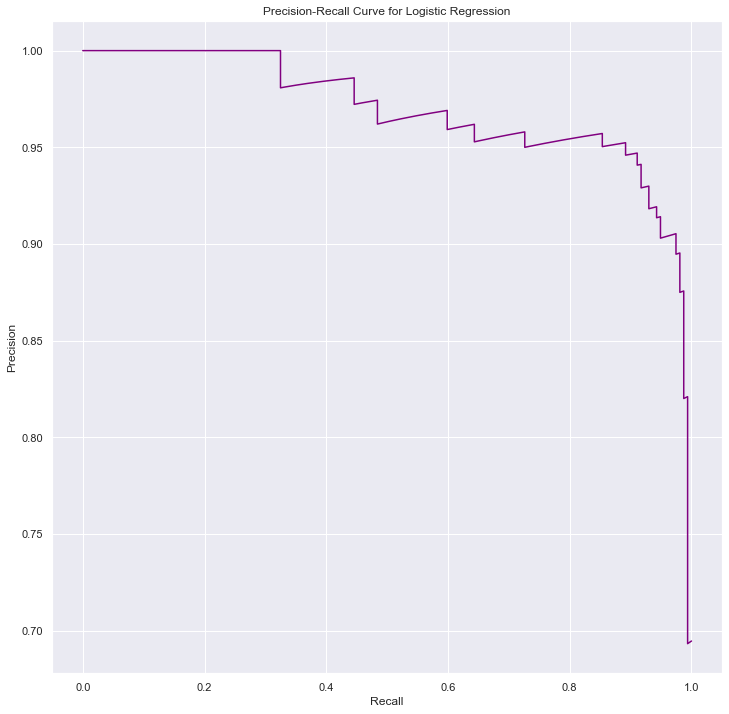

In [29]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, generate_probs(X_test))

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve for Logistic Regression')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

#### Nice! The recall score of minority class bumped up to 95% with C=10 from 87% in normal logistic regression. So that means we are able to predict 95% of all potentially harzardous asteroids!

### Decision Tree:

In [38]:
%%time

# Implementing a Decision Tree model, the hyperparameters have been set after observing how the model performed during multiple runs

modeling_pipeline = Pipeline([('data_processing', processing_pipeline), ('dt', DecisionTreeClassifier())])

param_grid = [
  {'dt__max_depth': [2, 5, 10],
   'dt__min_samples_split':[3, 5, 10],
   'dt__min_samples_leaf': [2, 5, 10],
   'dt__class_weight':[None, 'balanced']
  }
 ]

gcv_results = GridSearchCV(estimator=modeling_pipeline, param_grid=param_grid, scoring='recall', refit=True)
gcv_results = gcv_results.fit(X_train, y_train)

gcv_results.best_estimator_

Wall time: 25min 6s


Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['a', 'e', 'i', 'om', 'w',
                                                   'q', 'ad', 'per.y',
                                                   'data_arc', 'condition_code',
                                                   'n_obs_used',
                                                   'n_del_obs_used',
                                                   'n_dop_obs_used', 'H',
                                                   'pdes', 'prefix', 'G', 'M1',
                    

In [39]:
y_testp = gcv_results.predict(X_test)
y_testp_dt = gcv_results.predict_proba(X_test)

print(classification_report(y_test, y_testp))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    122246
           1       1.00      1.00      1.00       157

    accuracy                           1.00    122403
   macro avg       1.00      1.00      1.00    122403
weighted avg       1.00      1.00      1.00    122403



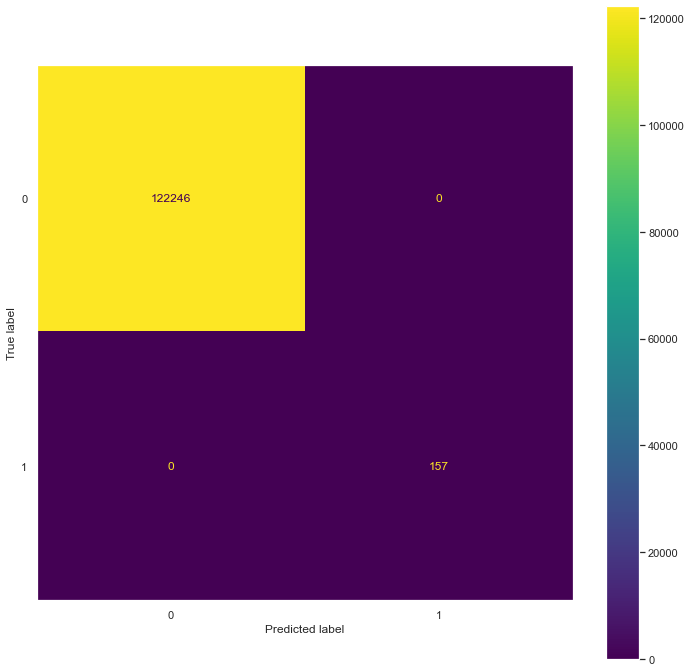

In [40]:
plot_confusion_matrix(gcv_results, X_test, y_test)
plt.grid(False)
plt.show()

In [41]:
def generate_probs(X, model=gcv_results):
    return model.predict_proba(X)[:, 1]

print("ROC-AUC score: ")
print(roc_auc_score(y_test, generate_probs(X_test)))

ROC-AUC score: 
1.0


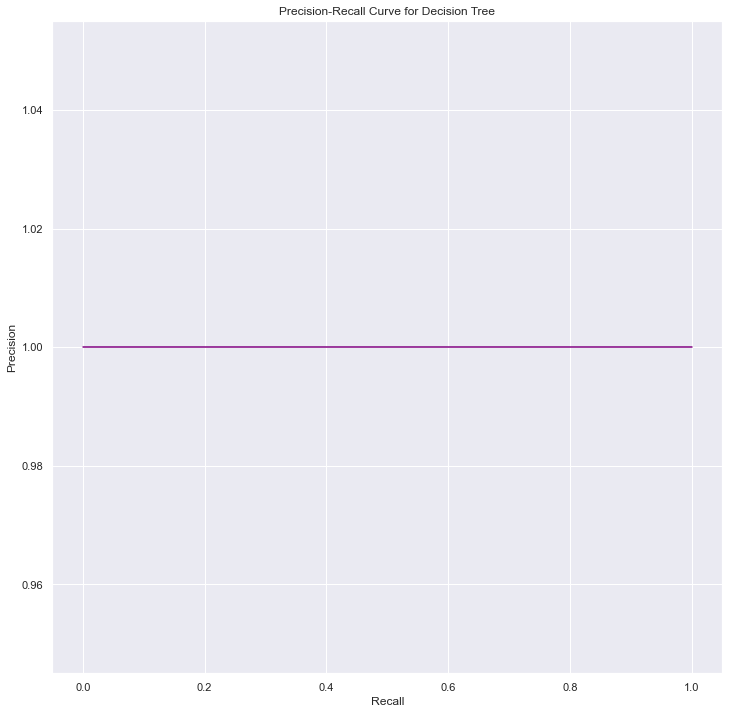

In [42]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, generate_probs(X_test))

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve for Decision Tree')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

#### The Decision Tree model successfully identified all the PHAs, getting us a perfect recall score. Nice!

### Random Forest:

In [45]:
%%time

# Implementing a Random Forest model, the hyperparameters have been set after observing how the model performed during multiple runs

rf_pipeline = Pipeline([
    ('data_processing', processing_pipeline),
    ('rf', RandomForestClassifier())]
)

param_grid = [{'rf__max_depth': [2, 3],
               'rf__n_estimators': [10, 50],
               'rf__class_weight': ['balanced', 'balanced_subsample'],
               'rf__max_samples': [1000, 2000, 5000]
              }]

rf_results = GridSearchCV(estimator=rf_pipeline, param_grid=param_grid, scoring='recall', refit=True)
rf_results = rf_results.fit(X_train, y_train)
rf_yhat = rf_results.predict(X_test)

rf_results.best_estimator_

Wall time: 10min 42s


Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['a', 'e', 'i', 'om', 'w',
                                                   'q', 'ad', 'per.y',
                                                   'data_arc', 'condition_code',
                                                   'n_obs_used',
                                                   'n_del_obs_used',
                                                   'n_dop_obs_used', 'H',
                                                   'pdes', 'prefix', 'G', 'M1',
                    

In [46]:
y_testp = rf_results.predict(X_test)
y_testp_rf = rf_results.predict_proba(X_test)

print(classification_report(y_test, y_testp))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    122246
           1       0.91      0.95      0.93       157

    accuracy                           1.00    122403
   macro avg       0.96      0.97      0.97    122403
weighted avg       1.00      1.00      1.00    122403



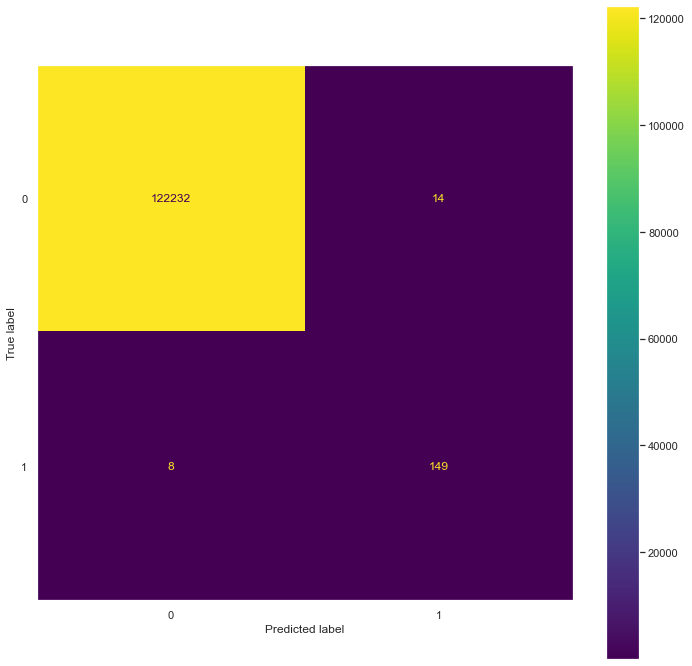

In [47]:
plot_confusion_matrix(rf_results, X_test, y_test)
plt.grid(False)
plt.show()

In [48]:
def generate_probs(X, model=rf_results):
    return model.predict_proba(X)[:, 1]

print("ROC-AUC score: ")
print(roc_auc_score(y_test, generate_probs(X_test)))

ROC-AUC score: 
0.9999681127466586


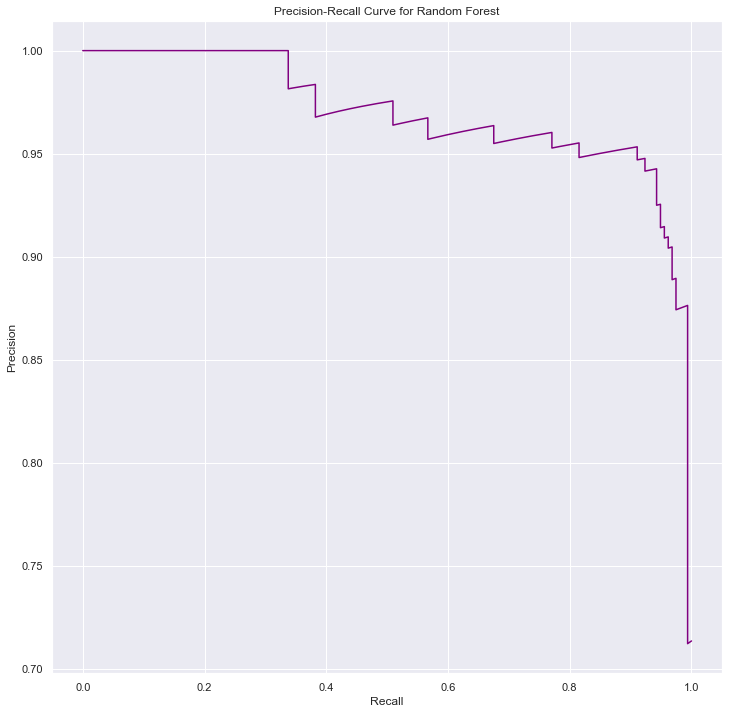

In [49]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, generate_probs(X_test))

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve for Random Forest')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

#### The Random Forest model also performed well and we got a recall score of 98% for the minority class.

### Support Vector Classifier:

In [52]:
%%time

# Implementing a Support Vector Classifier, the hyperparameters have been set after observing how the model performed during multiple runs

svm_pipeline = Pipeline([
    ('data_processing', processing_pipeline),
    ('svm', SVC(probability=True))]
)

param_grid = [
  {'svm__C': [0.1, 1, 10], 'svm__kernel': ['linear']}
 ]

svm_results = GridSearchCV(estimator=svm_pipeline, param_grid=param_grid, scoring='recall', refit=True, cv=3)
svm_results = svm_results.fit(X_train, y_train)

svm_results.best_estimator_

Wall time: 54min 12s


Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['a', 'e', 'i', 'om', 'w',
                                                   'q', 'ad', 'per.y',
                                                   'data_arc', 'condition_code',
                                                   'n_obs_used',
                                                   'n_del_obs_used',
                                                   'n_dop_obs_used', 'H',
                                                   'pdes', 'prefix', 'G', 'M1',
                    

In [53]:
y_testp = svm_results.predict(X_test)
y_testp_svm = svm_results.predict_proba(X_test)

print(classification_report(y_test, y_testp))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    122246
           1       0.93      0.99      0.96       157

    accuracy                           1.00    122403
   macro avg       0.97      1.00      0.98    122403
weighted avg       1.00      1.00      1.00    122403



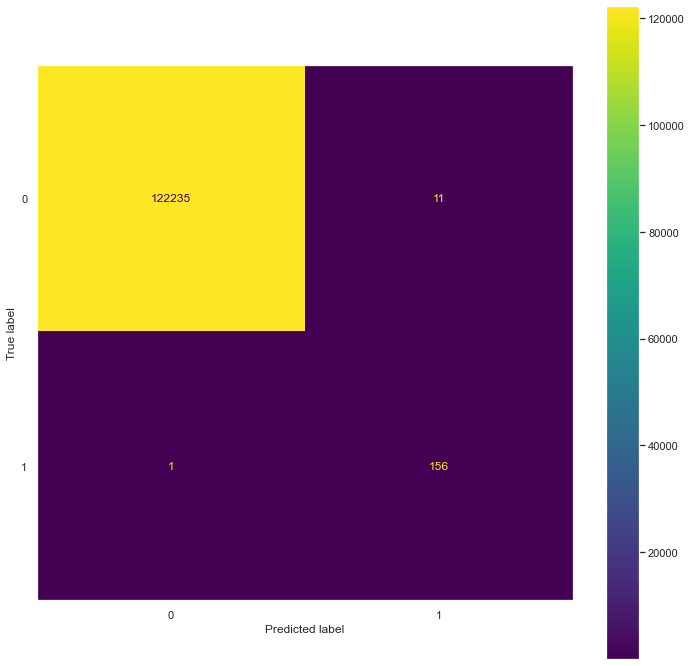

In [54]:
plot_confusion_matrix(svm_results, X_test, y_test)
plt.grid(False)
plt.show()

In [55]:
def generate_probs(X, model=svm_results):
    return model.predict_proba(X)[:, 1]

print("ROC-AUC score: ")
print(roc_auc_score(y_test, generate_probs(X_test)))

ROC-AUC score: 
0.99997452145934


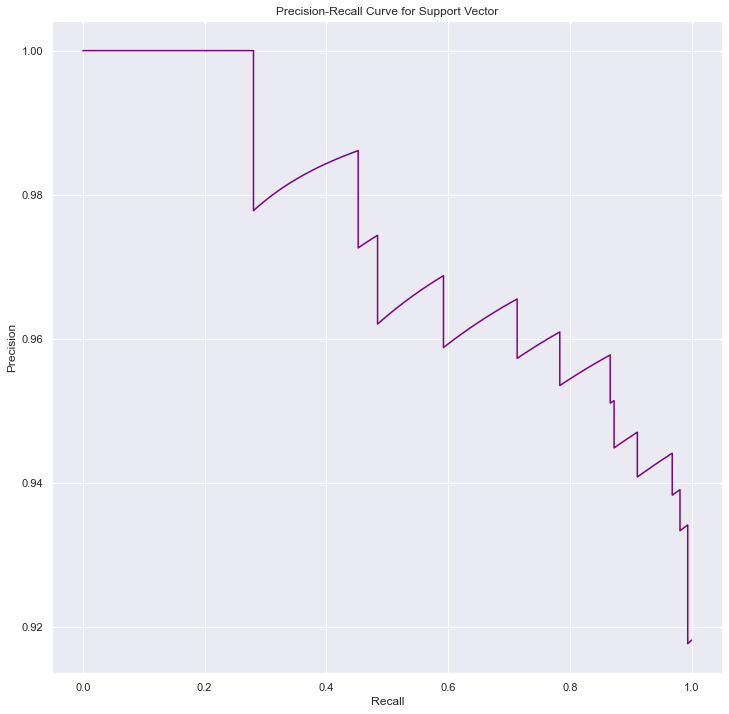

In [56]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, generate_probs(X_test))

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve for Support Vector')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

#### Support Vector Classifier also performed really well, getting a recall score of 99% for the minority class. This model also gave very few false positives and false negatives.

### KNN:

In [57]:
%%time

# Implementing a KNN classifier, the hyperparameters have been set after observing how the model performed during multiple runs

knn_pipeline = Pipeline([
    ('data_processing', processing_pipeline),
    ('knn', KNeighborsClassifier())]
)

param_grid = [
  {'knn__n_neighbors': [4, 8, 10], 'knn__weights': ['uniform']}
 ]

knn_results = GridSearchCV(estimator=knn_pipeline, param_grid=param_grid, scoring='recall', refit=True, cv=3)
knn_results = knn_results.fit(X_train, y_train)

knn_results.best_estimator_

Wall time: 2h 6min 7s


Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('proc_numeric',
                                                  Pipeline(steps=[('impute_missing',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize_num',
                                                                   StandardScaler())]),
                                                  ['a', 'e', 'i', 'om', 'w',
                                                   'q', 'ad', 'per.y',
                                                   'data_arc', 'condition_code',
                                                   'n_obs_used',
                                                   'n_del_obs_used',
                                                   'n_dop_obs_used', 'H',
                                                   'pdes', 'prefix', 'G', 'M1',
                    

In [58]:
y_testp = knn_results.predict(X_test)
y_testp_knn = knn_results.predict_proba(X_test)

print(classification_report(y_test, y_testp))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    122246
           1       0.60      0.29      0.39       157

    accuracy                           1.00    122403
   macro avg       0.80      0.65      0.70    122403
weighted avg       1.00      1.00      1.00    122403



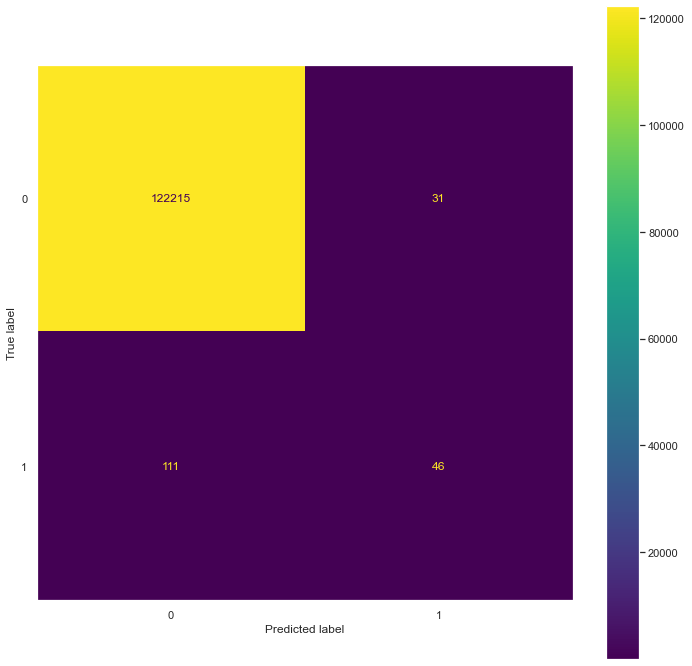

In [59]:
plot_confusion_matrix(knn_results, X_test, y_test)
plt.grid(False)
plt.show()

In [61]:
print("ROC-AUC score: ")
print(roc_auc_score(y_test, y_testp_knn[:, 1]))

ROC-AUC score: 
0.9675125941624859


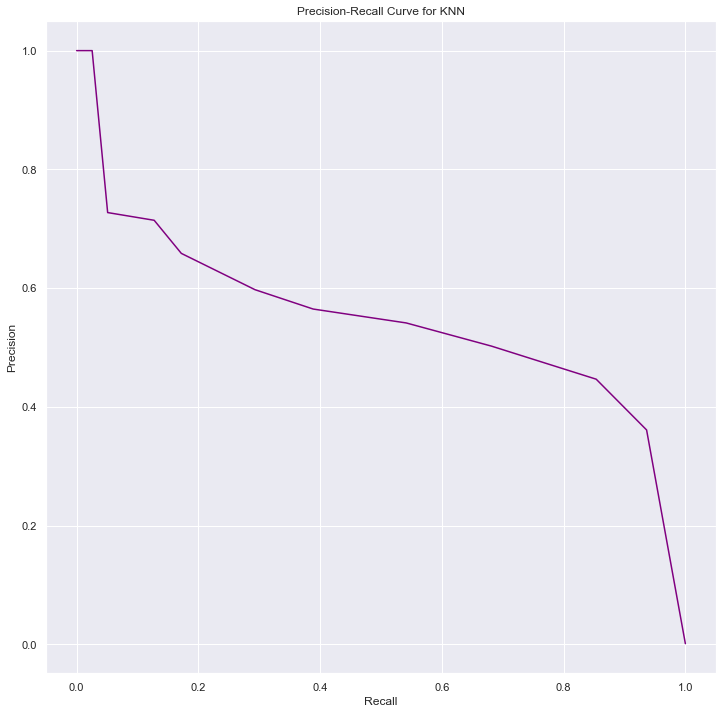

In [62]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_testp_knn[:, 1])

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve for KNN')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

#### KNN is probably not a good classifier for the problem I have at hand. Minority class recall of 28% is unacceptable and I'll be ignoring this model's results.

### Based on my classification problem, I don't think Naive Bayes would be a good classifier. Hence didn't model NB classifier.

### Ensemble Learning:

In [33]:
%%time

# Implementing an ensemble model using the models with their hyperparameters which gave the best results

clf1 = LogisticRegression(penalty='l2', C=10)
clf2 = DecisionTreeClassifier(max_depth=2, min_samples_leaf=2, min_samples_split=3)
clf3 = SVC(C=10, kernel='linear', probability=True)
clf4 = RandomForestClassifier(class_weight='balanced', max_depth=2, max_samples=5000)

pipe1 = Pipeline([('data_processing', processing_pipeline),('logreg', clf1)])
pipe2 = Pipeline([('data_processing', processing_pipeline),('dt', clf2)])
pipe3 = Pipeline([('data_processing', processing_pipeline),('svm', clf3)])
pipe4 = Pipeline([('data_processing', processing_pipeline),('rf', clf4)])

ems = [('logreg', pipe1),('dt', pipe2),('svm', pipe3), ('rf', pipe4)]
ensemble_model = VotingClassifier(estimators= ems, weights=None, voting='soft')

ensemble_results = ensemble_model.fit(X_train, y_train)

Wall time: 12min 37s


In [34]:
y_hat = ensemble_results.predict(X_test)

print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    122246
           1       0.96      0.99      0.97       157

    accuracy                           1.00    122403
   macro avg       0.98      1.00      0.99    122403
weighted avg       1.00      1.00      1.00    122403



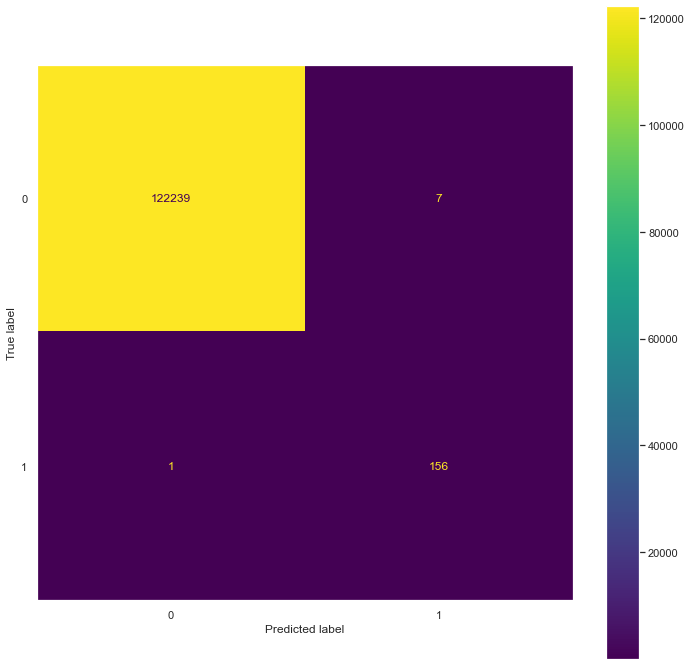

In [35]:
plot_confusion_matrix(ensemble_results, X_test, y_test)
plt.grid(False)
plt.show()

In [36]:
def generate_probs(X, model=ensemble_results):
    return model.predict_proba(X)[:, 1]

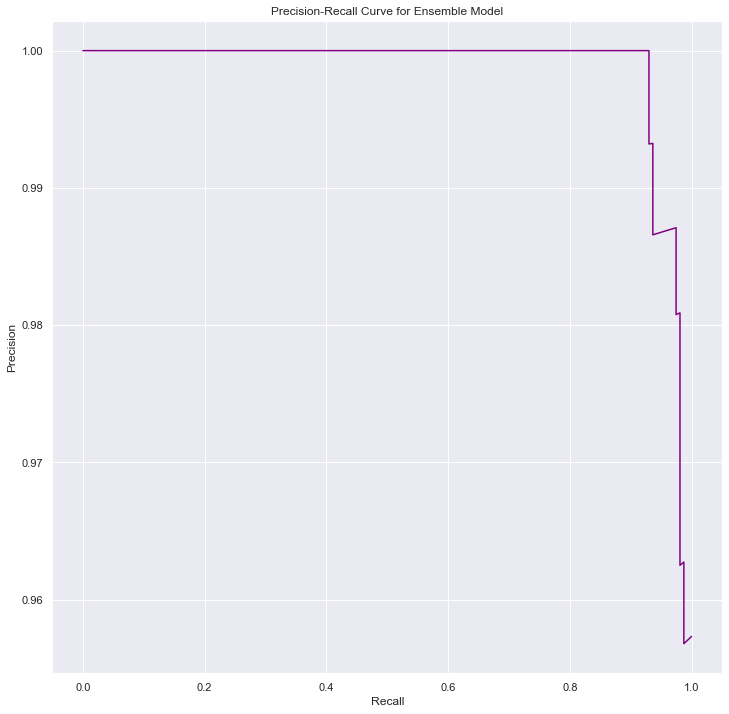

In [37]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, generate_probs(X_test))

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve for Ensemble Model')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

#### The ensemble model also performs really well with the minority class recall score at 99%.

### Key Takeaways:

#### 1. Our data was highly imbalanced with about 99% data belonging to class 0 and less than 1% data belonging to class 1. That's why we focused on the recall score to measure our model performance.
#### 2. Models which performed really well were Logistic Regression with regularization, Decision Tree, Random Forest, Support Vector Classifier and the ensemble built consisting of above models.
#### 3. Decision Trees model strangely gave 100% recall score, to which I'm more scared of rather happy. I'm glad the model was capable of predicting the asteroid class perfectly as the classification problem is a high risk one. 
#### 4. My first choice of model for this particular classification task at hand would be the Decision Tree but a really close and almost tie would be the ensemble model because both these models give really good recall scores for class 1.
#### 5. Machine Learning is a very powerful tool.

#### References:
1. https://scikit-learn.org/stable/modules/preprocessing.html
2. https://medium.com/@ritesh.110587/correlation-between-categorical-variables-63f6bd9bf2f7
3. https://datascience.stackexchange.com/questions/65839/macro-average-and-weighted-average-meaning-in-classification-report
4. https://elitedatascience.com/imbalanced-classes
5. https://pandas-profiling.ydata.ai/docs/master/index.html
6. https://datascience.stackexchange.com/questions/36862/macro-or-micro-average-for-imbalanced-class-problems
7. https://inside.getyourguide.com/blog/2020/9/30/what-makes-a-good-f1-score
8. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html

#### Special References:
1. https://github.com/appliedecon/data602-lectures/blob/main/logistic-regression/logistic-regression.ipynb
2. https://github.com/appliedecon/data602-lectures/blob/main/trees/trees.ipynb
3. https://github.com/appliedecon/data602-lectures/blob/main/supervised-algorithms/knn-nb-svm.ipynb
4. https://github.com/appliedecon/data602-lectures/blob/main/ensembles/ensembles.ipynb

In [63]:
import pickle

pickle.dump(log_reg_model, open('lr_model.pkl', 'wb'))
pickle.dump(lr_reg_results, open('lr_reg_model.pkl', 'wb'))
pickle.dump(gcv_results, open('dt_model.pkl', 'wb'))
pickle.dump(rf_results, open('rf_model.pkl', 'wb'))
pickle.dump(svm_results, open('svc_model.pkl', 'wb'))
pickle.dump(knn_results, open('knn_model.pkl', 'wb'))
pickle.dump(ensemble_results, open('ensemble_model.pkl', 'wb'))